## Data Acquisition and Combination

In this step, we gather data from various European cities to construct a comprehensive dataset for our analysis. The data consists of Airbnb listings from different cities, each contained in a separate CSV file.

The process involves the following steps:

1. **Initialization**: We start by creating an empty DataFrame `combined_df` which will eventually hold our combined dataset.
2. **CSV File Listing**: We have a list `csv_files` that contains the filenames of the CSV files to be imported. Each file corresponds to Airbnb listings from a different European city.
3. **Data Reading and Combining**:
   - For each file in `csv_files`, we extract the city name from the filename.
   - We read each CSV file into a temporary DataFrame `df`.
   - A new column named 'city' is inserted into `df` to store the city name, ensuring that we can trace each listing back to its source city.
   - The temporary DataFrame `df` is then appended to the list `combined_df`.
4. **Concatenation**: After iterating through all files, we concatenate the list of DataFrames into one unified DataFrame `combined_df`.

By the end of this process, we have a single DataFrame containing all the Airbnb listings from the specified European cities, with an additional 'city' column to indicate the origin of each listing.

In [1]:
import pandas as pd

combined_df = pd.DataFrame()

csv_files = ['amsterdam_weekdays.csv',
         'athens_weekdays.csv',
         'barcelona_weekdays.csv',
         'berlin_weekdays.csv',
         'budapest_weekdays.csv',
         'lisbon_weekdays.csv',
         'london_weekdays.csv',
         'paris_weekdays.csv',
         'rome_weekdays.csv',
         'vienna_weekdays.csv'
        ]

combined_df = []
directory = 'air_bnb_data/'

for file_name in csv_files:
    city_name = file_name.split('_')[0]
    df = pd.read_csv(f"{directory}{file_name}")
    df.insert(0, 'city', city_name)
    combined_df.append(df)
    
combined_df = pd.concat(combined_df, ignore_index=True)

## Data Exploration and Preprocessing

Once we have combined the data from various CSV files into a single DataFrame, `combined_df`, the next step is to explore this dataset and prepare it for further analysis.

1. **Shape of the DataFrame**: First, we print out the shape of `combined_df` using `combined_df.shape` to understand the size of our dataset in terms of number of rows (entries) and columns (features).

2. **Columns in the DataFrame**: We use `combined_df.columns` to list all the columns present in our DataFrame, which helps us identify any irrelevant or redundant columns that may need to be dropped.

3. **Dropping Unnecessary Columns**: In this case, we have identified an unnecessary column 'Unnamed: 0', which usually appears when the index of the DataFrame is saved as a separate column. We remove it using `combined_df.drop` to maintain a clean dataset.

4. **City Count**: We analyze the frequency of each city in our dataset using `combined_df['city'].value_counts()`. This gives us an insight into the number of listings per city and ensures that we have a significant amount of data for each city.

5. **Previewing Data**: To get a tangible feel for the data, we preview the first few (`combined_df.head()`) and last few (`combined_df.tail()`) entries. This helps in identifying any inconsistencies or anomalies at the beginning and end of the dataset.

6. **Data Types and Missing Values**:
   - Using `combined_df.info()`, we print a concise summary of the DataFrame to review the column data types and non-null counts, which is essential for determining the kind of data we are dealing with.
   - To check for missing values in each column, we use `combined_df.isna().sum()`. Identifying missing values is crucial before any analysis, as they can affect the outcome and accuracy.

7. **Descriptive Statistics**: Finally, we use `combined_df.describe()` to display descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset’s distribution. This is a vital step in understanding the range, mean, median, and other statistical features of our data.

In [2]:
print(combined_df.shape)

(25500, 21)


In [3]:
print(combined_df.columns)

Index(['city', 'Unnamed: 0', 'realSum', 'room_type', 'room_shared',
       'room_private', 'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat'],
      dtype='object')


In [4]:
combined_df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
city_count = combined_df['city'].value_counts()
print(city_count)

city
london       4614
rome         4492
paris        3130
lisbon       2857
athens       2653
budapest     2074
vienna       1738
barcelona    1555
berlin       1284
amsterdam    1103
Name: count, dtype: int64


In [6]:
combined_df.head()

,city,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,amsterdam,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,amsterdam,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,amsterdam,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,amsterdam,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,amsterdam,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


In [7]:
combined_df.tail()

,city,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
25495,vienna,219.012224,Entire home/apt,False,False,4.0,False,0,0,8.0,80.0,0,0.298179,0.257904,851.189543,60.958556,593.167136,14.180090,16.37766,48.20875
25496,vienna,191.197438,Entire home/apt,False,False,4.0,False,0,1,10.0,100.0,2,1.052982,0.332054,195.654600,14.011946,305.781569,7.309930,16.37892,48.19973
25497,vienna,251.501765,Entire home/apt,False,False,2.0,False,0,0,8.0,86.0,1,0.810224,0.100844,204.967222,14.678876,342.177253,8.179995,16.38070,48.20296
25498,vienna,637.636444,Entire home/apt,False,False,2.0,False,0,0,10.0,93.0,1,0.994039,0.202537,169.074867,12.108419,282.299117,6.748565,16.38568,48.20460
25499,vienna,133.230489,Private room,False,True,4.0,True,1,0,10.0,93.0,1,1.263948,0.480922,150.449976,10.774584,225.245048,5.384646,16.39066,48.20811


In [8]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25500 entries, 0 to 25499
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   city                        25500 non-null  object 
 1   realSum                     25500 non-null  float64
 2   room_type                   25500 non-null  object 
 3   room_shared                 25500 non-null  bool   
 4   room_private                25500 non-null  bool   
 5   person_capacity             25500 non-null  float64
 6   host_is_superhost           25500 non-null  bool   
 7   multi                       25500 non-null  int64  
 8   biz                         25500 non-null  int64  
 9   cleanliness_rating          25500 non-null  float64
 10  guest_satisfaction_overall  25500 non-null  float64
 11  bedrooms                    25500 non-null  int64  
 12  dist                        25500 non-null  float64
 13  metro_dist                  255

In [9]:
combined_df.isna().sum()

city                          0
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
dtype: int64

In [10]:
combined_df.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000
mean,275.681904,3.175529,0.293529,0.358745,9.389176,92.586549,1.165725,3.160597,0.680994,293.734519,13.265403,625.004708,23.499036,7.594875,45.568793
std,354.279644,1.308675,0.455388,0.479642,0.954920,8.964563,0.634562,2.385645,0.849603,223.797459,9.699020,500.614980,17.745870,9.827575,5.252706
min,37.129295,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.015059,0.003944,15.532918,0.926301,21.455803,0.667010,-9.226340,37.953000
25%,145.168856,2.000000,0.000000,0.000000,9.000000,90.000000,1.000000,1.433281,0.250707,135.310097,6.305256,246.196343,9.829716,-0.065040,41.393000
50%,207.148849,3.000000,0.000000,0.000000,10.000000,95.000000,1.000000,2.591957,0.415916,234.030980,11.330320,519.418450,17.726663,4.892140,47.502130
75%,311.390202,4.000000,1.000000,1.000000,10.000000,98.000000,1.000000,4.226353,0.742088,386.369921,17.231257,832.396771,33.411143,16.308532,51.465620
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.000000,22.617451,13.314108,4512.595170,100.000000,5584.771840,100.000000,23.786020,52.641410


In [11]:
wanted_columns = ['city', 'realSum', 'person_capacity', 'room_type', 'host_is_superhost', 'guest_satisfaction_overall', 'cleanliness_rating', 'bedrooms', 'dist', 'metro_dist', 'attr_index', 'rest_index']

combined_df = combined_df[wanted_columns]

In [12]:
combined_df.head()

,city,realSum,person_capacity,room_type,host_is_superhost,guest_satisfaction_overall,cleanliness_rating,bedrooms,dist,metro_dist,attr_index,rest_index
0,amsterdam,194.033698,2.0,Private room,False,93.0,10.0,1,5.022964,2.539380,78.690379,98.253896
1,amsterdam,344.245776,4.0,Private room,False,85.0,8.0,1,0.488389,0.239404,631.176378,837.280757
2,amsterdam,264.101422,2.0,Private room,False,87.0,9.0,1,5.748312,3.651621,75.275877,95.386955
3,amsterdam,433.529398,4.0,Private room,False,90.0,9.0,2,0.384862,0.439876,493.272534,875.033098
4,amsterdam,485.552926,2.0,Private room,True,98.0,10.0,1,0.544738,0.318693,552.830324,815.305740


## Data Cleaning

Following the initial exploration and preprocessing of our combined dataset in `combined_df`, we proceeded with further cleaning steps to prepare our data for in-depth analysis and visualizations. Here's a detailed breakdown of the actions taken:

1. **Value Counts of Key Columns**: Initially, we print the value counts for critical categorical columns such as `room_type` and `host_is_superhost`. This step helps us understand the distribution of different types of rooms and whether most hosts are classified as superhosts.

2. **One Hot Encoding**:
   - For the `host_is_superhost` column, which originally contains boolean or categorical values indicating whether a host is a superhost or not, we convert it to integers (1 for true and 0 for false).
   - The `room_type` column, indicating the type of room offered, is converted from categorical to a numerical format using mapping (__0__ for __entire home/apt__, __1__ for __private room__, __2__ for __shared room__).
   - Similarly, the `city` column is mapped to numerical identifiers, with each city assigned a unique number from 0 to 9, standardizing the data.

3. **Data Visualization**:
   - We then visualize the dataset using boxplots to identify any potential outliers or anomalies in the numerical data across the different categories. The boxplot visualizations help pinpoint extreme values that could distort further analysis.
   - A heatmap of the correlation matrix is plotted to examine the relationships between different numerical variables, providing insights into possible connections or redundancies within the data.

4. **Outlier Removal**:
   - Outliers can skew results and mislead analyses, especially in datasets involving prices or other financial metrics. We use the quantile-based method to remove outliers, keeping only the data within the 5th to 95th percentiles for the `realSum` column.
   - This method is repeated for other sensitive numerical indices such as `attr_index` and `rest_index` to ensure that our dataset represents a more typical, central performance without the noise introduced by extreme values.

5. **Final Data Visualization Post-Cleaning**:
   - Post-cleaning, boxplots are re-drawn for the key metrics including prices and indices across cities, using a logarithmic scale for better visual interpretation of spread and central tendencies across varied ranges.

Through these cleaning steps, we ensure that the data in `combined_df` is not only consistent and appropriately formatted but also trimmed of any extreme values that could bias our further analysis and modeling. This rigorous cleaning ensures a solid foundation for the subsequent stages of our data science project.


In [13]:
room_type = combined_df['room_type'].value_counts()
print(room_type)

host_is_superhost = combined_df['host_is_superhost'].value_counts()
print(host_is_superhost)

room_type
Entire home/apt    15994
Private room        9326
Shared room          180
Name: count, dtype: int64
host_is_superhost
False    18908
True      6592
Name: count, dtype: int64


In [14]:
# One hot encoding

# combined_df['host_is_superhost'] = combined_df['host_is_superhost'].astype(int)

combined_df['room_type'] = combined_df['room_type'].map({
    'Entire home/apt': 0,
    'Private room': 1,
    'Shared room': 2
})

combined_df['city_original'] = combined_df['city']
combined_df = pd.get_dummies(combined_df, columns=['city'])

combined_df['city_original_hot_code'] = combined_df['city_original'].map({
    'amsterdam': 0,
    'athens': 1,
    'barcelona': 2,
    'berlin': 3,
    'budapest': 4,
    'lisbon': 5,
    'london': 6,
    'paris': 7,
    'rome': 8,
    'vienna': 9
})

combined_df.head()

,realSum,person_capacity,room_type,host_is_superhost,guest_satisfaction_overall,cleanliness_rating,bedrooms,dist,metro_dist,attr_index,...,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna,city_original_hot_code
0,194.033698,2.0,1,False,93.0,10.0,1,5.022964,2.539380,78.690379,...,False,False,False,False,False,False,False,False,False,0
1,344.245776,4.0,1,False,85.0,8.0,1,0.488389,0.239404,631.176378,...,False,False,False,False,False,False,False,False,False,0
2,264.101422,2.0,1,False,87.0,9.0,1,5.748312,3.651621,75.275877,...,False,False,False,False,False,False,False,False,False,0
3,433.529398,4.0,1,False,90.0,9.0,2,0.384862,0.439876,493.272534,...,False,False,False,False,False,False,False,False,False,0
4,485.552926,2.0,1,True,98.0,10.0,1,0.544738,0.318693,552.830324,...,False,False,False,False,False,False,False,False,False,0


In [15]:
room_type = combined_df['room_type'].value_counts()
print(room_type)

host_is_superhost = combined_df['host_is_superhost'].value_counts()
print(host_is_superhost)

room_type
0    15994
1     9326
2      180
Name: count, dtype: int64
host_is_superhost
False    18908
True      6592
Name: count, dtype: int64


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

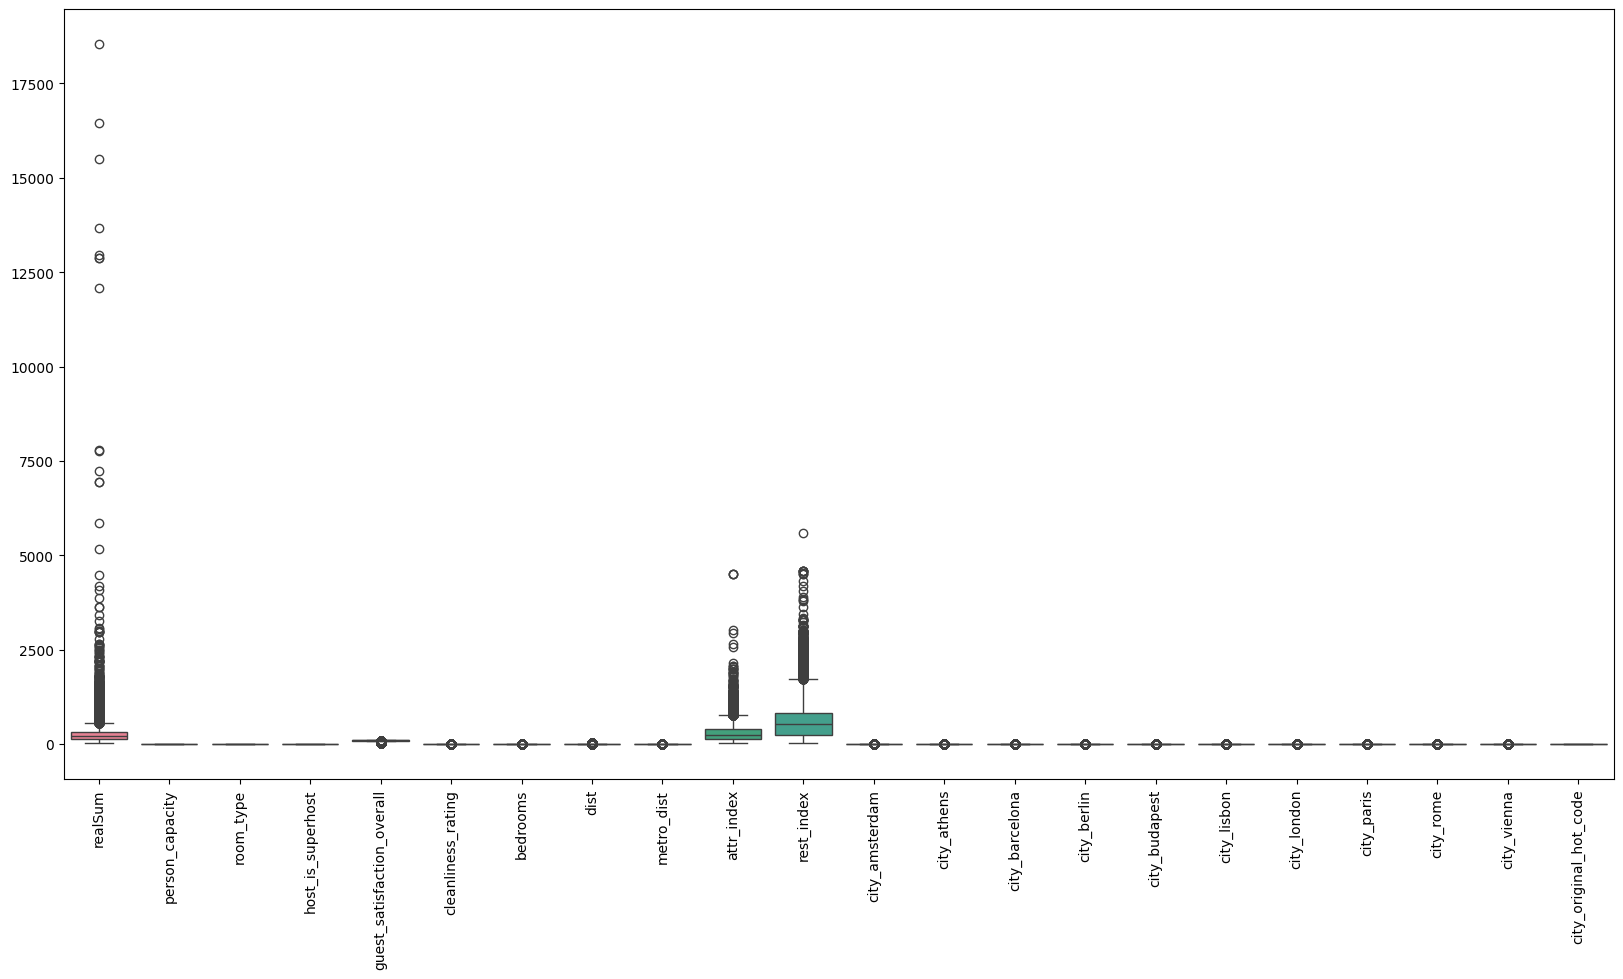

In [17]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=combined_df)
plt.xticks(rotation=90)
plt.show()

- The plot displays a wide range of values for the realSum category, with numerous outliers indicating extreme prices.
- The categories person_capacity, bedrooms, dist, metro_dist, attr_index, and rest_index show less variability, with attr_index and rest_index displaying some moderate outliers.
- The city, room_type, host_is_superhost, and guest_satisfaction_overall categories appear to have data points that are tightly packed with no visible outliers, which suggests limited variability or a binary/limited range of values.

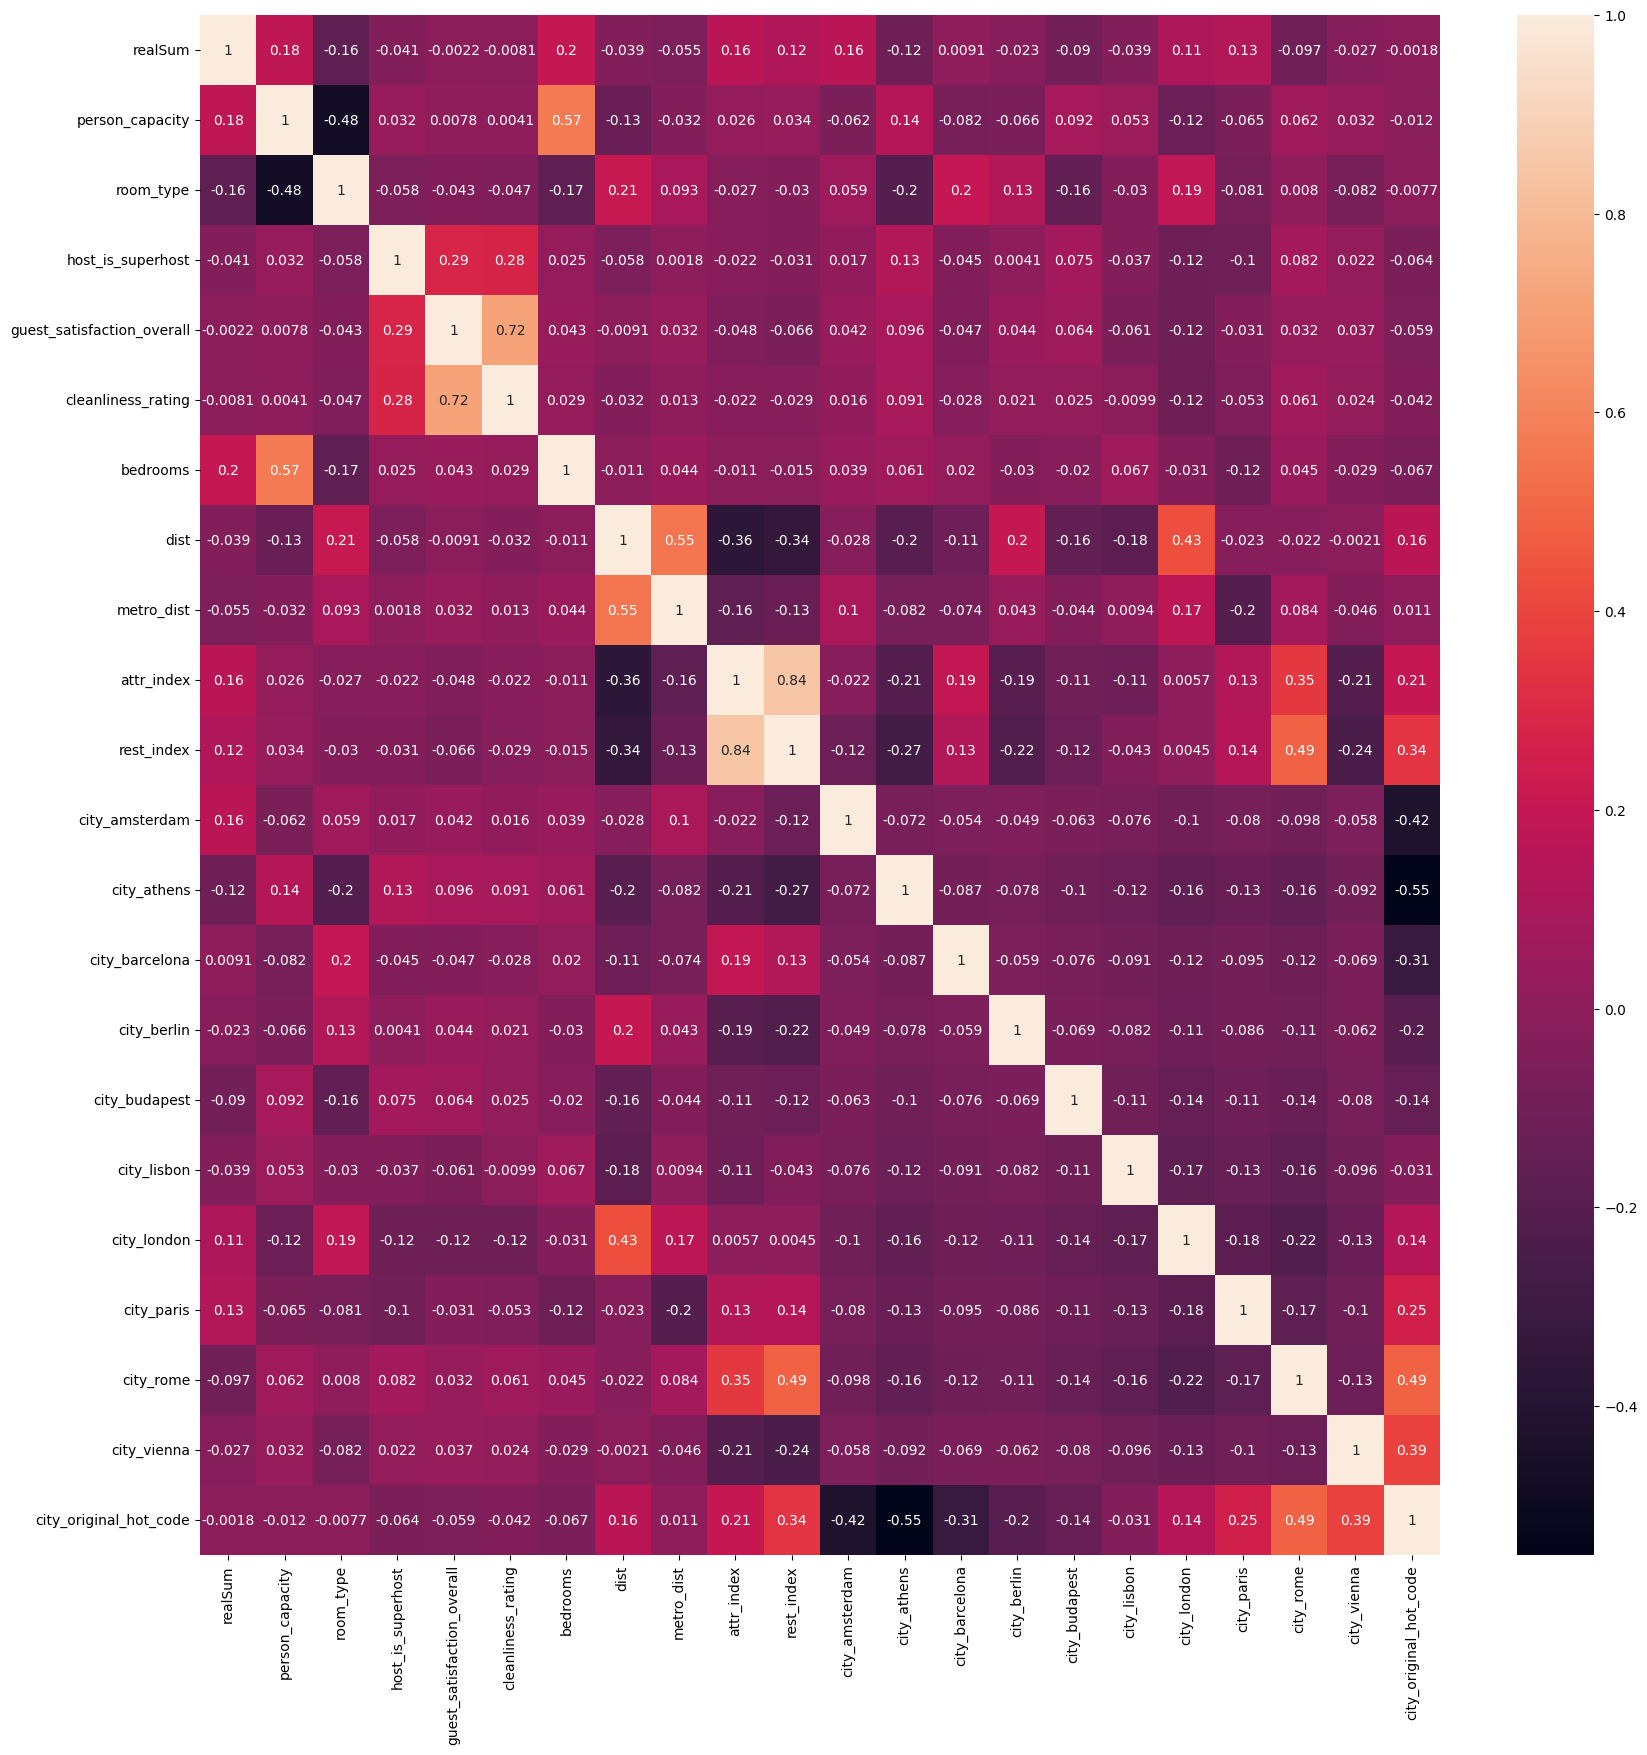

In [18]:
# Correlation matrix
no_categorical = combined_df.drop(columns=['city_original'])
plt.figure(figsize=(20, 20))
sns.heatmap(no_categorical.corr(), annot=True)
plt.show()

- The heatmap shows the correlation coefficients between different variables.
- There is a range of correlations from strong positive (close to 1) to strong negative (close to -1).
- Notably, attr_index and rest_index seem to have a high positive correlation with each other, suggesting that as the attraction index increases, the restaurant index tends to increase as well.
- The person_capacity and bedrooms also show a moderate positive correlation, which is expected as larger homes tend to have more bedrooms.

/tmp/ipykernel_21570/3905243499.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${}'.format(int(y)) for y in plt.gca().get_yticks()])


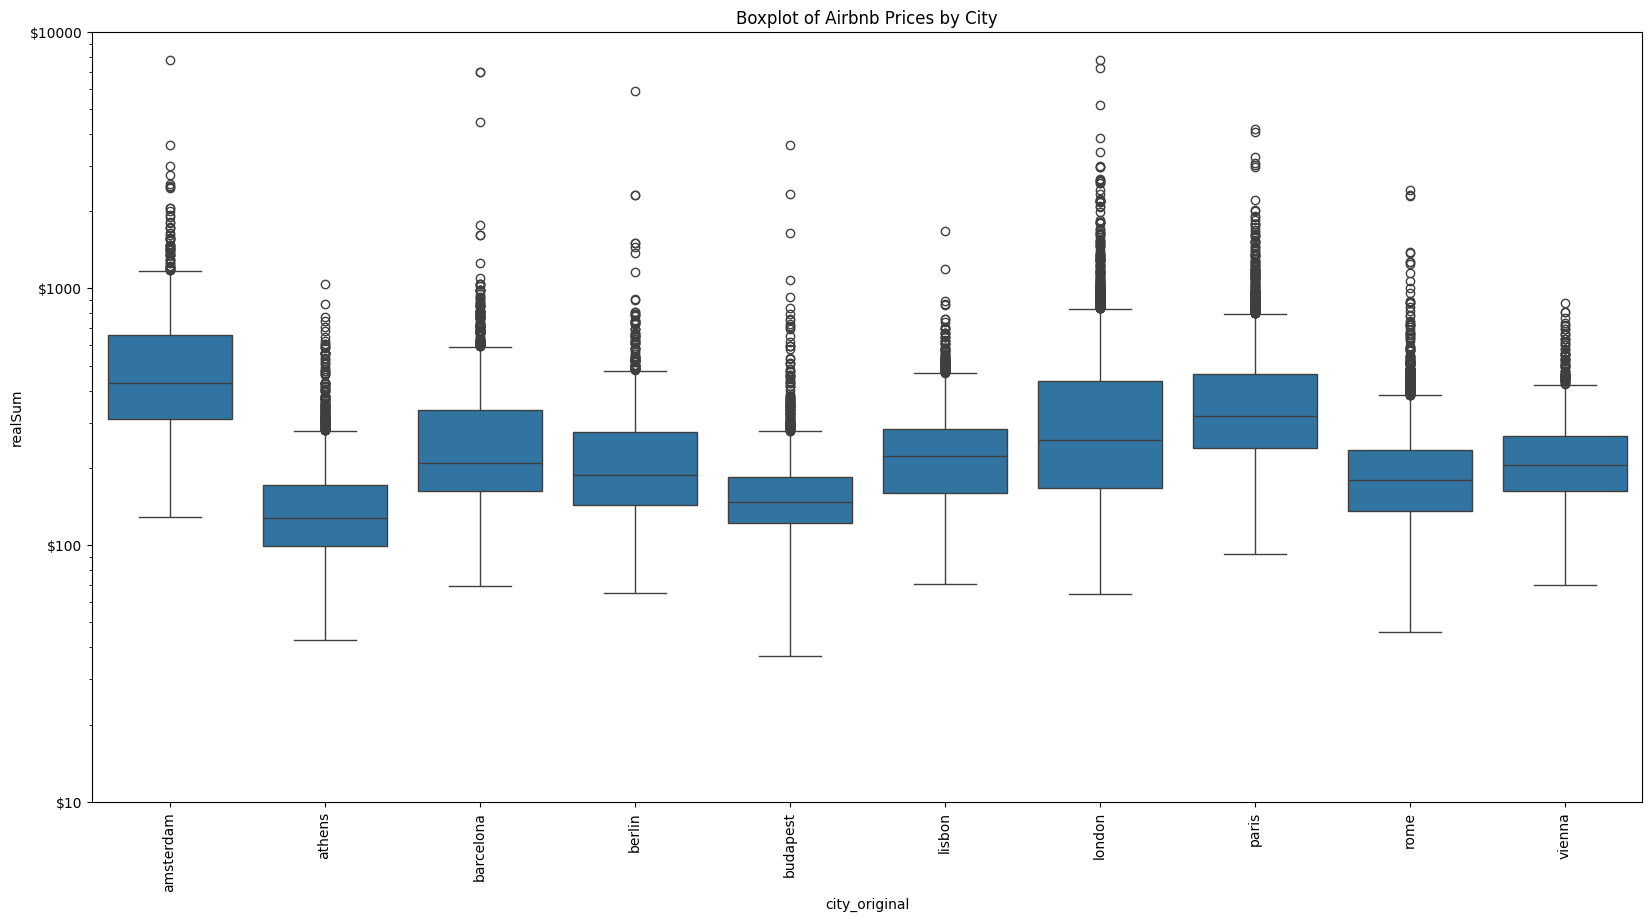

In [19]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='city_original', y='realSum', data=combined_df)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Boxplot of Airbnb Prices by City')

plt.gca().set_ylim(bottom=10, top=10000)
plt.gca().set_yticklabels(['${}'.format(int(y)) for y in plt.gca().get_yticks()])

plt.show()

- The plot reveals the price distribution across different cities, with the median, quartiles, and outliers represented for each city.
- The logarithmic scale helps in comparing the cities more effectively, as it normalizes the wide range of prices.
- Outliers are present in all cities, indicating listings with significantly higher prices than the median.

In [20]:
def remove_outliers(df, column_name): # prompt suggested by Github Copilot
    return df[(df[column_name] >= df[column_name].quantile(0.05)) & (df[column_name] <= df[column_name].quantile(0.95))]

In [21]:
combined_df = combined_df.groupby('city_original').apply(remove_outliers, 'realSum').reset_index(drop=True)

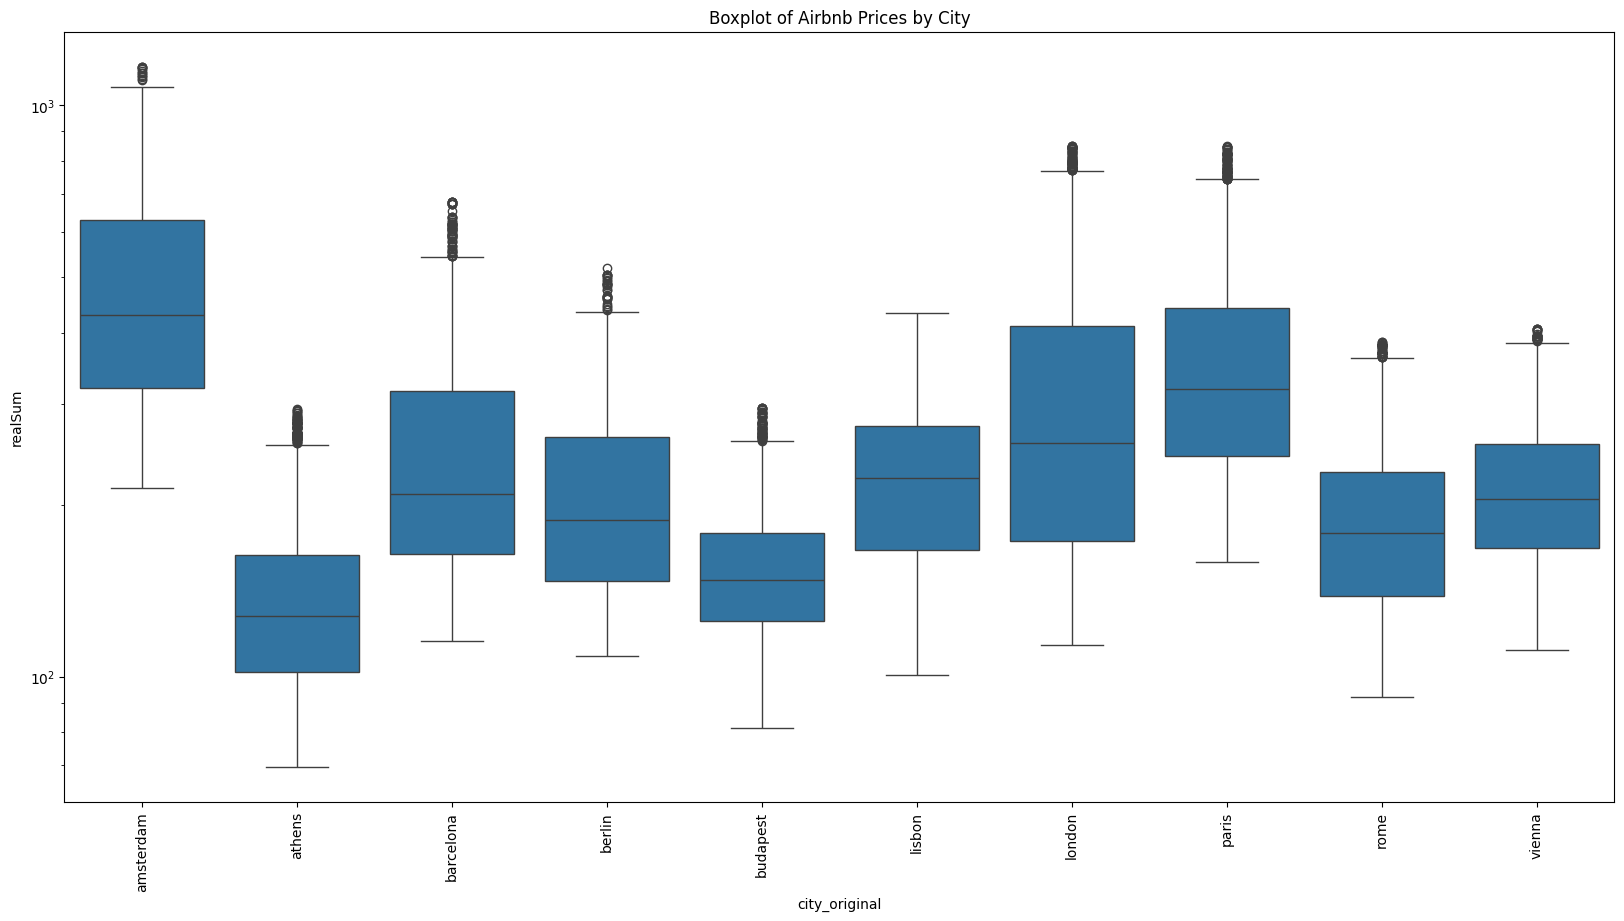

In [22]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='city_original', y='realSum', data=combined_df)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Boxplot of Airbnb Prices by City')
plt.show()


- Similar to the previous boxplot but with fewer extreme outliers, showing that some price outliers have been removed.
- The median and quartile ranges for each city remain visible, providing insight into the central tendency and spread of prices after cleaning the data.

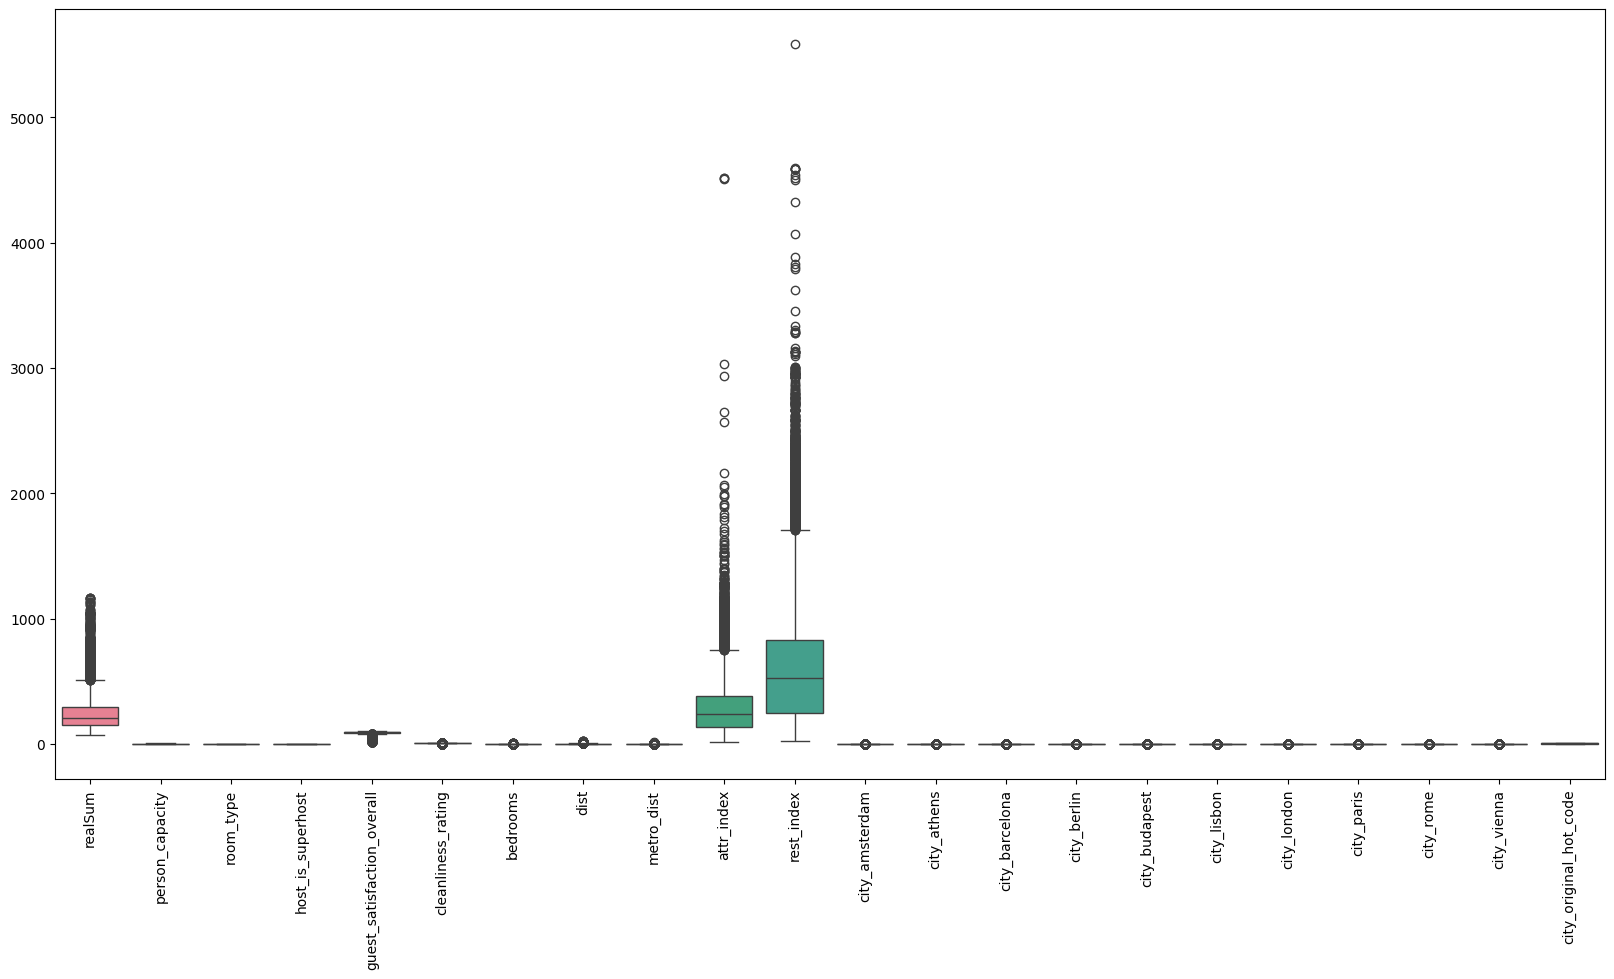

In [23]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=combined_df)
plt.xticks(rotation=90)
plt.show()

- This plot shows a cleaner representation with fewer outliers compared to the initial boxplot, particularly in the attr_index and rest_index categories.
- The range of values in realSum is notably reduced, indicating that outlier prices have been removed.

In [24]:
combined_df = combined_df.groupby('city_original').apply(remove_outliers, 'attr_index').reset_index(drop=True)
combined_df = combined_df.groupby('city_original').apply(remove_outliers, 'rest_index').reset_index(drop=True)

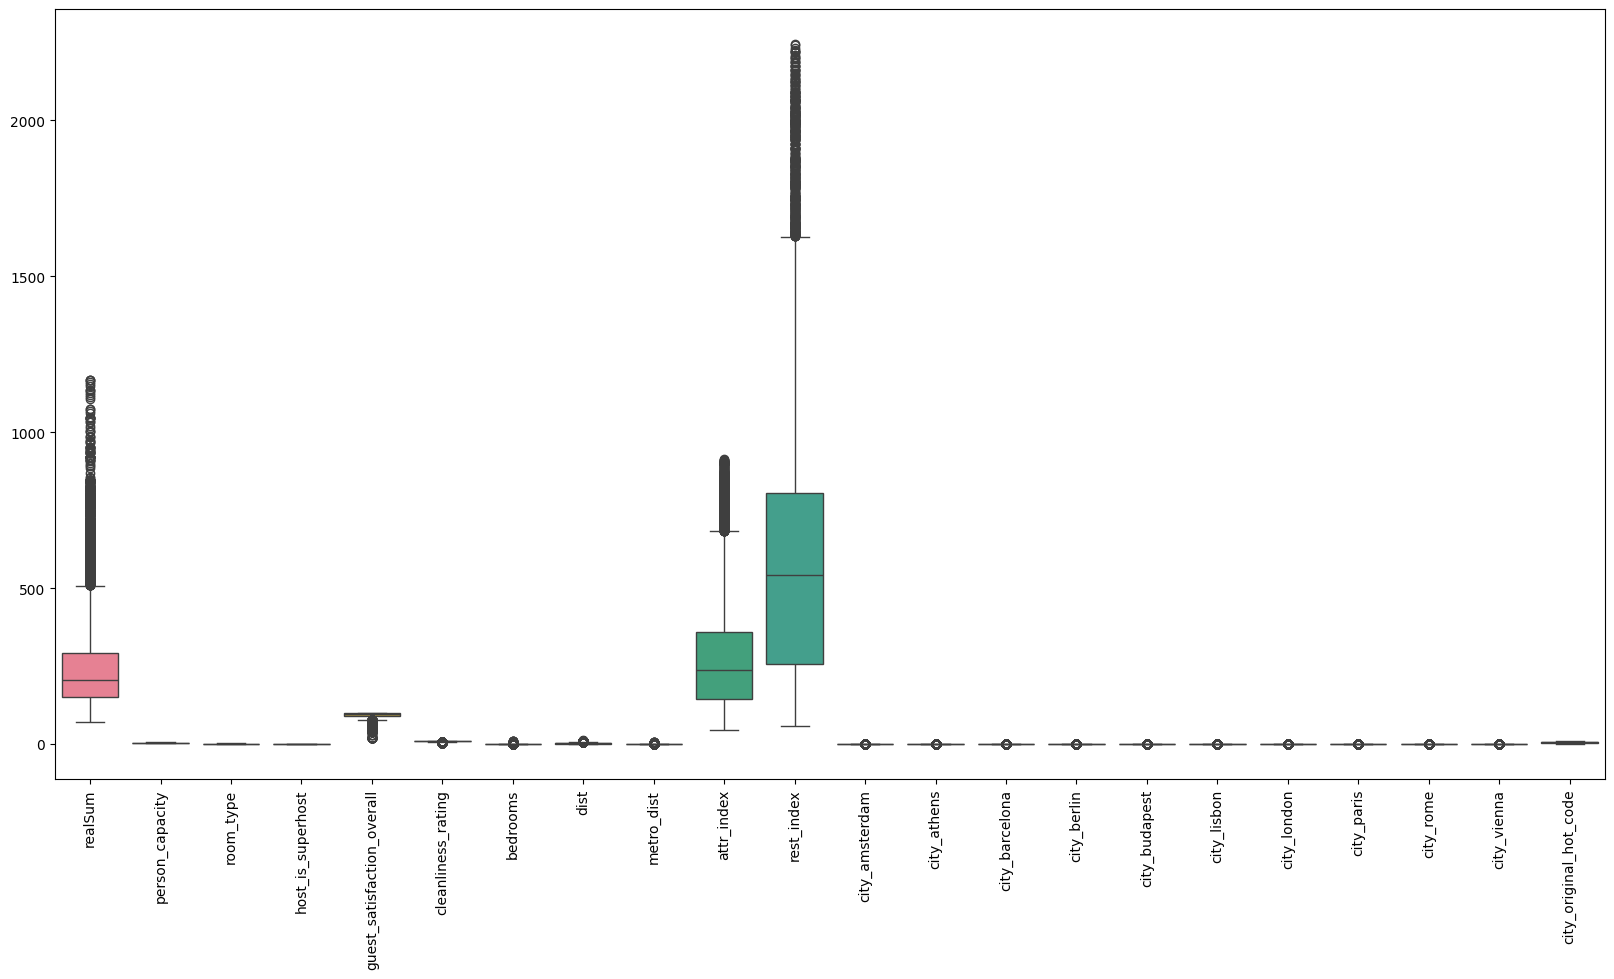

In [25]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=combined_df)
plt.xticks(rotation=90)
plt.show()

- The plot shows that after further cleaning, the attr_index and rest_index categories now have fewer extreme values, reducing the potential impact of these outliers on subsequent analysis.

In [26]:
combined_df.shape

(18653, 23)

## Multivariate Analysis

In [27]:
import numpy as np

In [28]:
city = combined_df['city_original']
realSum = combined_df['realSum']
person_capacity = combined_df['person_capacity']
room_type = combined_df['room_type']
host_is_superhost = combined_df['host_is_superhost']
guest_satisfaction_overall = combined_df['guest_satisfaction_overall']
bedrooms = combined_df['bedrooms']
dist = combined_df['dist']
metro_dist = combined_df['metro_dist']
cleanliness_rating = combined_df['cleanliness_rating']
attr_index = combined_df['attr_index']
rest_index = combined_df['rest_index']

In [53]:
# Asked ChatGPT for a function to plot scatter plot with the mean of realSum and cities
# As a response it suggested the following code which I modified into a function

def plot_by_average_realSum_scatter_plot(x, title, x_label):
    city_grouped = combined_df.groupby(x)['realSum'].mean().reset_index()
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel("Average realSum")

    city_codes = city_grouped[x].astype('category').cat.codes

    plt.scatter(city_codes, city_grouped['realSum'], label='Average realSum')

    coefficients = np.polyfit(city_codes, city_grouped['realSum'], 1)
    polynomial = np.poly1d(coefficients)

    plt.plot(city_codes, polynomial(city_codes), color='red', label='Trend Line')
    plt.legend()
    plt.xticks(city_codes, city_grouped[x], rotation='vertical')
    plt.tight_layout()
    plt.show()

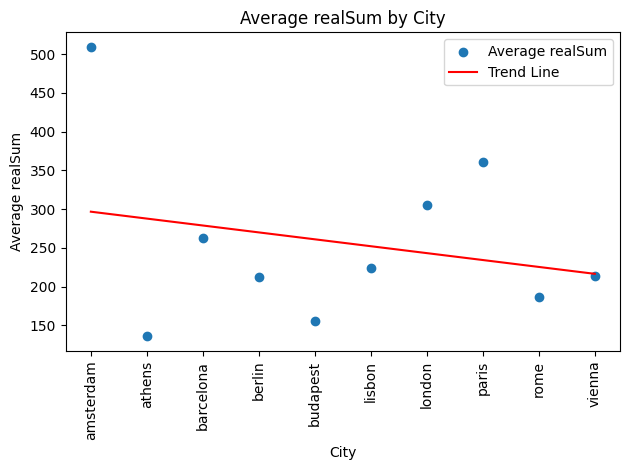

In [30]:
plot_by_average_realSum_scatter_plot('city_original', 'Average realSum by City', 'City')

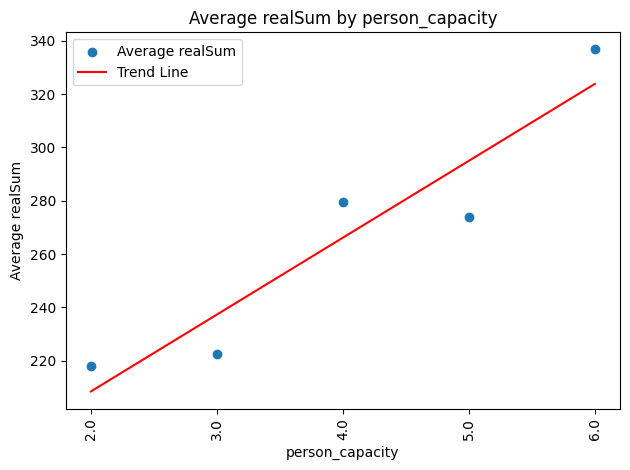

In [31]:
plot_by_average_realSum_scatter_plot('person_capacity', 'Average realSum by person_capacity', 'person_capacity')

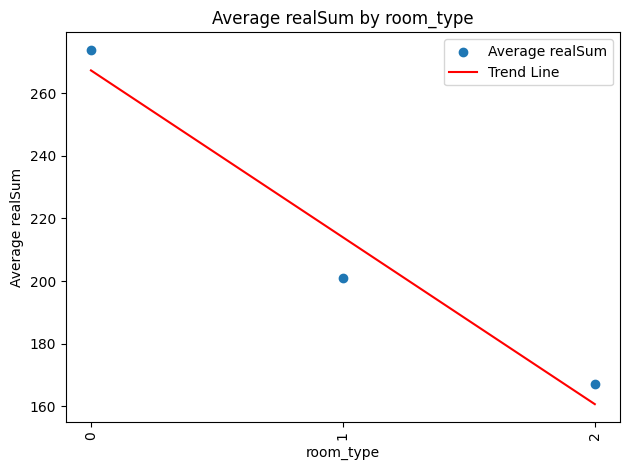

In [32]:
plot_by_average_realSum_scatter_plot('room_type', 'Average realSum by room_type', 'room_type')

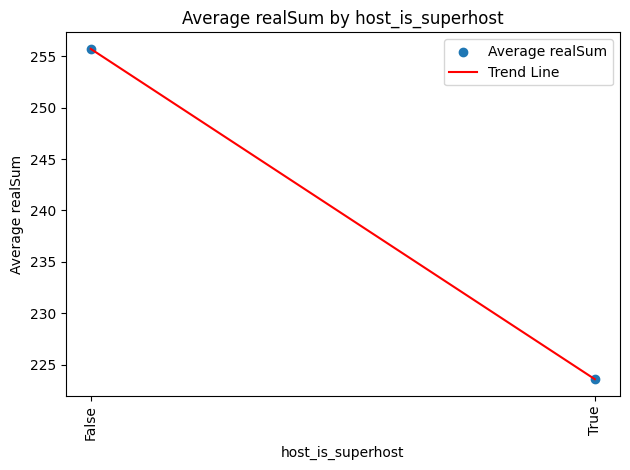

In [33]:
plot_by_average_realSum_scatter_plot('host_is_superhost', 'Average realSum by host_is_superhost', 'host_is_superhost')

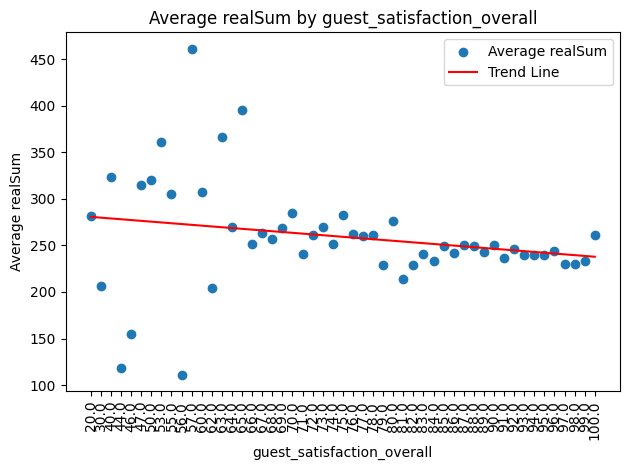

In [34]:
plot_by_average_realSum_scatter_plot('guest_satisfaction_overall', 'Average realSum by guest_satisfaction_overall', 'guest_satisfaction_overall')

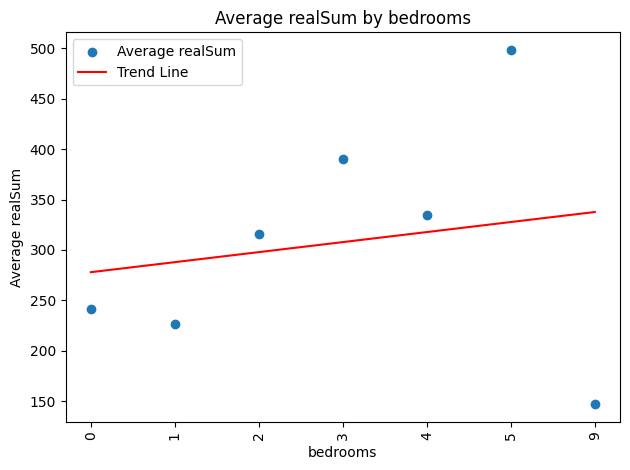

In [35]:
plot_by_average_realSum_scatter_plot('bedrooms', 'Average realSum by bedrooms', 'bedrooms')

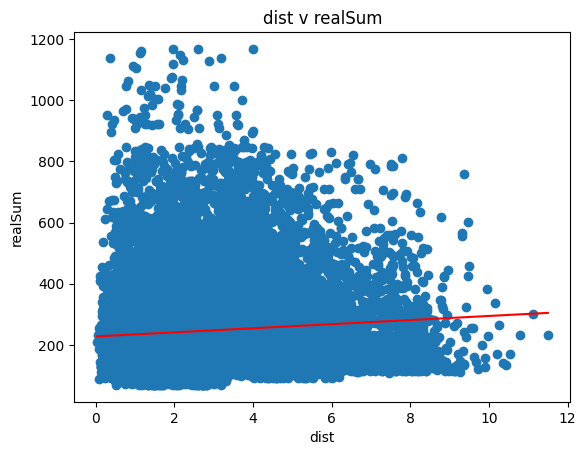

In [36]:
plt.title("dist v realSum")
plt.xlabel("dist")
plt.ylabel("realSum")
plt.scatter(dist, realSum)
plt.plot(np.unique(dist), np.poly1d(np.polyfit(dist, realSum, 1))(np.unique(dist)), color='red')

# plot_by_average_realSum_scatter_plot('dist', 'Average realSum by dist', 'dist')

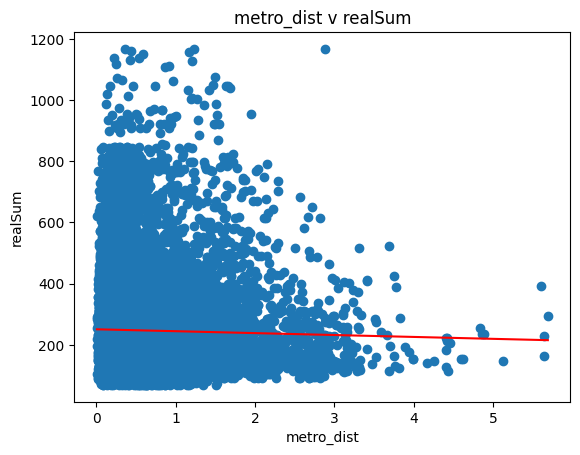

In [37]:
plt.title("metro_dist v realSum")
plt.xlabel("metro_dist")
plt.ylabel("realSum")
plt.scatter(metro_dist, realSum)
plt.plot(np.unique(metro_dist), np.poly1d(np.polyfit(metro_dist, realSum, 1))(np.unique(metro_dist)), color='red')

# plot_by_average_realSum_scatter_plot('metro_dist', 'Average realSum by metro_dist', 'metro_dist')

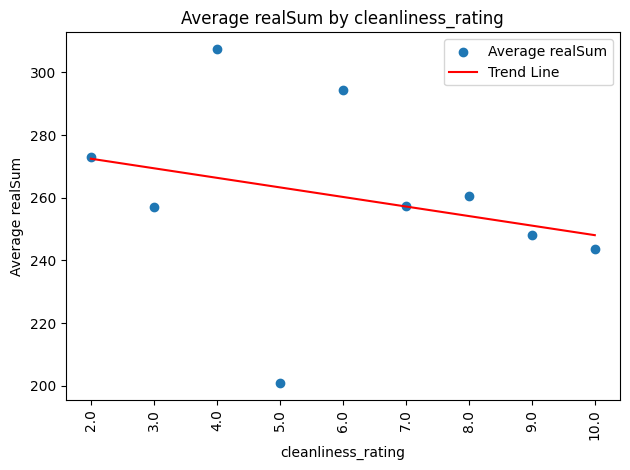

In [38]:
plot_by_average_realSum_scatter_plot('cleanliness_rating', 'Average realSum by cleanliness_rating', 'cleanliness_rating')

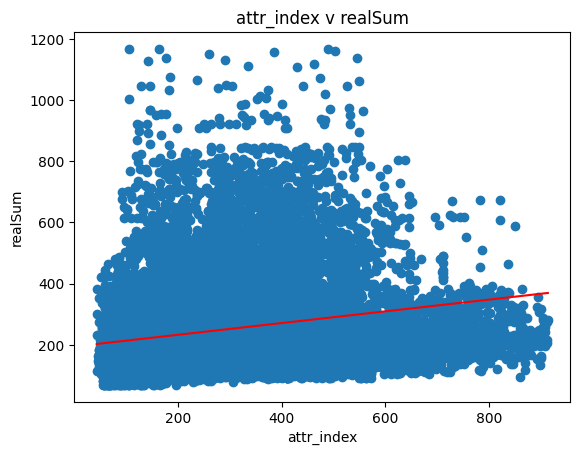

In [39]:
plt.title("attr_index v realSum")
plt.xlabel("attr_index")
plt.ylabel("realSum")
plt.scatter(attr_index, realSum)
plt.plot(np.unique(attr_index), np.poly1d(np.polyfit(attr_index, realSum, 1))(np.unique(attr_index)), color='red')

# plot_by_average_realSum_scatter_plot('attr_index', 'Average realSum by attr_index', 'attr_index')

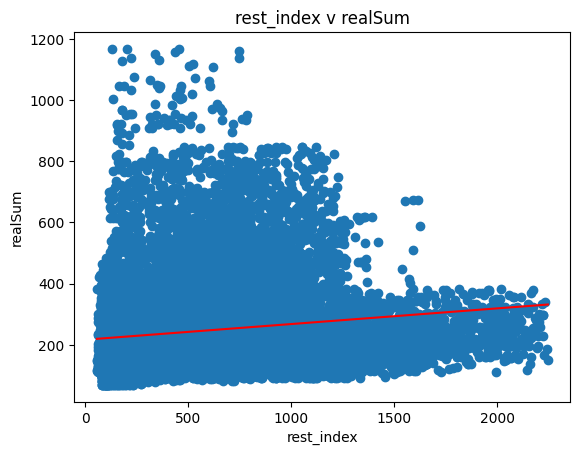

In [40]:
plt.title("rest_index v realSum")
plt.xlabel("rest_index")
plt.ylabel("realSum")
plt.scatter(rest_index, realSum)
plt.plot(np.unique(rest_index), np.poly1d(np.polyfit(rest_index, realSum, 1))(np.unique(rest_index)), color='red')

# plot_by_average_realSum_scatter_plot('rest_index', 'Average realSum by rest_index', 'rest_index')

In [41]:
from sklearn.discriminant_analysis import StandardScaler

In [42]:
Standard_Scaler = StandardScaler()

In [43]:
features_to_scale = ['person_capacity','host_is_superhost','guest_satisfaction_overall','bedrooms','dist','metro_dist','attr_index','rest_index', 'cleanliness_rating']
remaining_features = ['city_amsterdam',	'city_athens',	'city_barcelona',	'city_berlin'	,'city_budapest',	'city_lisbon'	,'city_london',	'city_paris',	'city_rome',	'city_vienna','room_type', 'realSum']

In [44]:
scaled_features = pd.DataFrame(Standard_Scaler.fit_transform(combined_df[features_to_scale]), columns=features_to_scale)
scaled_features.head()

,person_capacity,host_is_superhost,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,rest_index,cleanliness_rating
0,-0.104314,-0.599128,0.834657,1.425831,-0.416948,2.466372,-0.603248,-0.914391,-1.468868
1,-0.895599,-0.599128,0.157912,-0.217827,-0.556400,0.272164,-0.449560,-0.870883,0.638570
2,0.686971,-0.599128,0.383494,1.425831,0.467534,1.143118,-1.018447,-1.140612,-0.415149
3,-0.895599,-0.599128,-0.518833,-0.217827,0.146223,0.635694,-0.412709,-0.881967,0.638570
4,-0.895599,-0.599128,0.383494,-0.217827,-1.041707,0.622081,0.820278,-0.097167,0.638570


In [45]:
scaled_data = pd.concat([scaled_features.reset_index(drop=True),  combined_df[remaining_features].reset_index(drop=True)], axis=1)
scaled_data.head()

,person_capacity,host_is_superhost,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,rest_index,cleanliness_rating,city_amsterdam,...,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna,room_type,realSum
0,-0.104314,-0.599128,0.834657,1.425831,-0.416948,2.466372,-0.603248,-0.914391,-1.468868,True,...,False,False,False,False,False,False,False,False,1,552.808567
1,-0.895599,-0.599128,0.157912,-0.217827,-0.556400,0.272164,-0.449560,-0.870883,0.638570,True,...,False,False,False,False,False,False,False,False,1,215.124317
2,0.686971,-0.599128,0.383494,1.425831,0.467534,1.143118,-1.018447,-1.140612,-0.415149,True,...,False,False,False,False,False,False,False,False,0,1001.804420
3,-0.895599,-0.599128,-0.518833,-0.217827,0.146223,0.635694,-0.412709,-0.881967,0.638570,True,...,False,False,False,False,False,False,False,False,1,276.521454
4,-0.895599,-0.599128,0.383494,-0.217827,-1.041707,0.622081,0.820278,-0.097167,0.638570,True,...,False,False,False,False,False,False,False,False,0,909.474375


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data.drop(columns=['realSum']), scaled_data['realSum'], test_size=0.15, random_state=42)

In [48]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15855, 20)
(15855,)
(2798, 20)
(2798,)


In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
model = LinearRegression()

In [51]:
model.fit(X_train,y_train)

LinearRegression()

In [52]:
print(f'Number of features used in the model is {model.coef_.shape[0]}')
print(f'R-squared value of the model on the training set is {model.score(X_train, y_train)}')
print(f'RMSE of the model on the training set is {np.sqrt(np.mean((model.predict(X_train) - y_train)**2))}')
print(f'SSR of the model on the training set is {np.sum((model.predict(X_train) - y_train)**2)}')

Number of features used in the model is 20
R-squared value of the model on the training set is 0.6153826378333311
RMSE of the model on the training set is 90.35495754633115
SSR of the model on the training set is 129440510.98997499
